<a href="https://colab.research.google.com/github/rafaeloureirosm/Challenge-Alura-DS/blob/main/Challenge_DataScience_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Data Handling libraries
import numpy as np
import pandas as pd

# Importing Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Importing Dataset Splitting, Cross Validation and Grid Search w/ Cross validation libraries
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# Importing Feature Scalling libraries
from sklearn.preprocessing import StandardScaler, normalize

# Importing Machine Learning Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Metrics libraries
from sklearn.metrics import confusion_matrix

# Importing Metric Plots libraries
from sklearn.metrics import classification_report, plot_confusion_matrix

# Importing Balancing libraries
from imblearn.over_sampling import SMOTE

# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bd = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

In [ ]:
bd.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [ ]:
bd.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Explorando o conteúdo de cada coluna**

> Como as colunas de customer, phone, internet, account estão com vários valores dentro de chaves e fica inviável de analisar apenas olhando para a tabela, vamos abrir o primeiro elemento de cada uma dessas colunas para entender cada uma delas.





In [ ]:
bd.customer[0]

{'Dependents': 'Yes',
 'Partner': 'Yes',
 'SeniorCitizen': 0,
 'gender': 'Female',
 'tenure': 9}



> Notamos que os elementos das colunas custumer, phone, internet, account são dicionários e apresentam muitas informações condensadas. Do modo que estão organizados é muito difícil realizar qualquer análise, portanto será necessário transformar cada uma das informações em uma nova coluna no DataFrame.


**Normalizando os dados de cada coluna**

Para transformar os dados em novas colunas, vamos utilizar o método pd.json_normalize(). Esse método mapeia cada chave do dicionário em uma nova coluna e os valores contidos se tornarão as linhas.

Precisamos realizar esse procedimento para cada uma das colunas custumer, phone, internet, account, armazenando o resultado em variáveis para serem agrupadas posteriormente.

In [ ]:
customer_dados = pd.json_normalize(bd.customer)
customer_dados

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [ ]:
phone_dados = pd.json_normalize(bd.phone)
phone_dados

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [ ]:
internet_dados = pd.json_normalize(bd.internet)
internet_dados

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [ ]:
account_dados = pd.json_normalize(bd.account, sep='')
account_dados

,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


**Juntando todas as normalizações**


> Para realizar a junção das informações, é necessário utilizar o método pd.concat().
Construímos uma função para realizar a normalização dos objetos json e a junção das informações em um DataFrame.





In [ ]:
def normalize_json(dataframe):
    return_dataframe = pd.DataFrame()
    for column in list(bd.columns[2:]):
        dataframe_column = pd.json_normalize(dataframe[column])
        return_dataframe = pd.concat([return_dataframe, dataframe_column], axis=1)
    
    return pd.concat([dataframe[list(bd.columns[:2])], return_dataframe], axis=1)

In [ ]:
bd = normalize_json(bd)
bd

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Com o método info(), visualizamos todas as colunas que foram geradas a partir da junção dos DataFrames.

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Vamos utilizar o método value_counts() em cada uma das colunas para indentificar possíveis categorias com nomes incorretos ou incoerentes.

In [ ]:
for coluna in bd.columns:
    print('---')
    print(bd[coluna].value_counts())

---
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: customerID, Length: 7267, dtype: int64
---
No     5174
Yes    1869
        224
Name: Churn, dtype: int64
---
Male      3675
Female    3592
Name: gender, dtype: int64
---
0    6085
1    1182
Name: SeniorCitizen, dtype: int64
---
No     3749
Yes    3518
Name: Partner, dtype: int64
---
No     5086
Yes    2181
Name: Dependents, dtype: int64
---
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---
Yes    6560
No      707
Name: PhoneService, dtype: int64
---
No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64
---
Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64
---
No                     3608
Yes             

É possível perceber na variável Churn que há uma categoria que não está nomeada, representando dados faltantes. Dados faltantes não nos trazem informação útil para análise e portanto devemos removê-los do conjunto de dados.

In [ ]:
bd['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

Para remover os dados com nome vazio, fazemos uma seleção na coluna Churn em que no nome seja diferente de vazio (''). Armazenamos o resultado na variável dados.

In [ ]:
# Removendo valores vazios em Churn

bd = bd[bd['Churn']!= '']
bd.reset_index(drop=True, inplace=True)

Ao fim da execução do código, podemos identificar que a variável Churn não apresenta mais a classe com nome vazio.


In [ ]:
bd['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Outra coluna que apresenta dados vazios (' ') é a Charges.Total. Essa coluna tem uma relação com Charges.Monthly e tenure.

A coluna tenure representa a quantidade de meses em que o cliente estava assinando o serviço. A coluna Charges.Monthly representa os gastos mensais do cliente e Charges.Total é a quantidade total de gastos, portanto seria uma multiplicação de Charges.Monthly por tenure.

Vamos selecionar todas as linhas onde o tenure = 0, ou seja, os clientes que assinaram o serviço por 0 meses, e mostrar os resultados para as colunas Charges.Total e Charges.Monthly.

In [ ]:
# Passa a query de busca e depois as colunas de retorno
bd.query('tenure == 0')[['Charges.Total', 'Charges.Monthly', 'tenure']]


,Charges.Total,Charges.Monthly,tenure
945,,56.05,0
1731,,20.00,0
1906,,61.90,0
2025,,19.70,0
2176,,20.25,0
2250,,25.35,0
2855,,73.35,0
3052,,25.75,0
3118,,52.55,0
4054,,80.85,0


Verificamos que quando tenure = 0, os dados de Charges.Total é vazio (' ').

Vamos agora selecionar os dados onde Charges.Total = ' ', mostrando os resultados para Charges.Monthly e tenure.

In [ ]:
# Pegando todas as linhas onde a coluna "Charges.Total" é vazia.

bd[bd['Charges.Total'] == ' '][['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,,56.05,0
1731,,20.00,0
1906,,61.90,0
2025,,19.70,0
2176,,20.25,0
2250,,25.35,0
2855,,73.35,0
3052,,25.75,0
3118,,52.55,0
4054,,80.85,0


Percebe-se que todas as linhas de Charges.Total que estão vazias é porque o cliente não assinou nem por um mês. Temos que preencher esse valor com o mesmo valor que está presente em "Charges.Monthly" pois esse representa o total.

In [ ]:
idx = bd[bd['Charges.Total'] == ' '].index
bd.loc[idx, "Charges.Total"] = bd.loc[idx, "Charges.Monthly"]

In [ ]:
bd.query('tenure == 0')[['Charges.Total', 'Charges.Monthly', 'tenure']]

,Charges.Total,Charges.Monthly,tenure
945,56.05,56.05,0
1731,20.0,20.00,0
1906,61.9,61.90,0
2025,19.7,19.70,0
2176,20.25,20.25,0
2250,25.35,25.35,0
2855,73.35,73.35,0
3052,25.75,25.75,0
3118,52.55,52.55,0
4054,80.85,80.85,0


Por fim, vamos armazenar os dados tratados em um arquivo Telco-Customer-Churn-limpeza.json na pasta Dados com o método to_json().

Os dados podem ser armazenados em qualquer formato de arquivo, por exemplo o csv com o método to_csv().

In [ ]:
bd.to_json("/content/drive/MyDrive/06.Projetos/01.Alura/Challenge_Data_Science_1/Dados/Telco-Customer-Churn-limpeza.json")  

Recuperando a base de dados salva no Drive

In [ ]:
bd = pd.read_json("/content/drive/MyDrive/06.Projetos/01.Alura/Challenge_Data_Science_1/Dados/Telco-Customer-Churn-limpeza.json")

Relembrando como está a estrutura do arquivo

In [ ]:
bd.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


**Testando a biblioteca MATPLOT**


---




In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

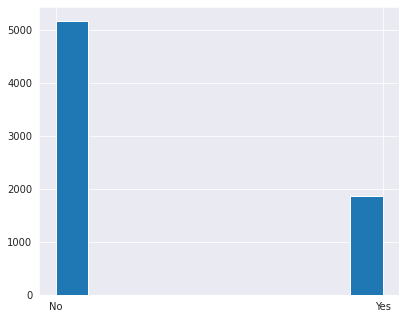

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(bd['Churn'])
eixo.grid(True)

In [ ]:
import seaborn as sns

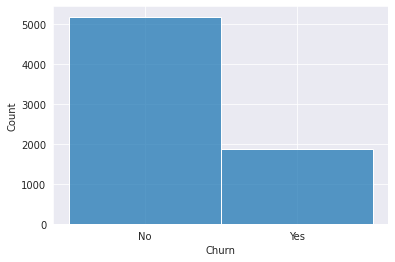

In [ ]:
sns.histplot(bd, x= bd['Churn'])

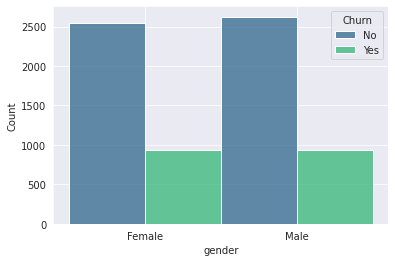

In [ ]:
sns.histplot(bd, x= bd['gender'], hue='Churn', multiple="dodge", palette='viridis')

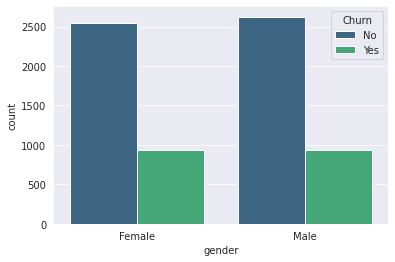

In [ ]:
sns.countplot(x='gender', 
              hue='Churn',
              data=bd, 
              palette='viridis')

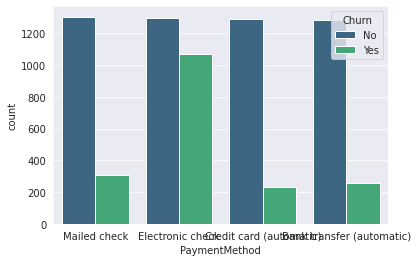

In [ ]:
sns.countplot(x='PaymentMethod', 
              hue='Churn',
              data=bd, 
              palette='viridis')

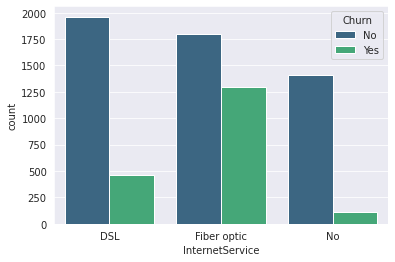

In [ ]:
sns.countplot(x='InternetService', 
              hue='Churn',
              data=bd, 
              palette='viridis')

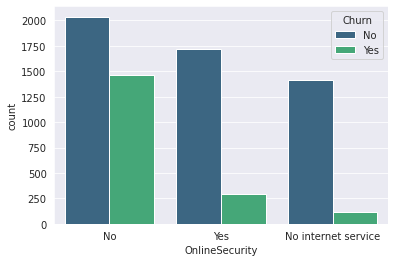

In [ ]:
sns.countplot(x='OnlineSecurity', 
              hue='Churn',
              data=bd, 
              palette='viridis')

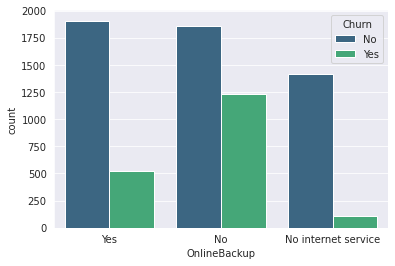

In [ ]:
sns.countplot(x='OnlineBackup', 
              hue='Churn',
              data=bd, 
              palette='viridis')

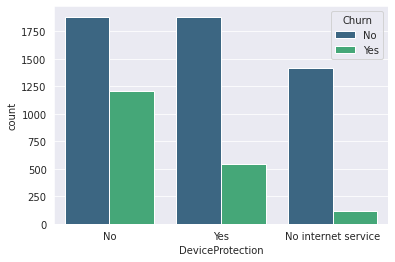

In [ ]:
sns.countplot(x='DeviceProtection', 
              hue='Churn',
              data=bd, 
              palette='viridis')

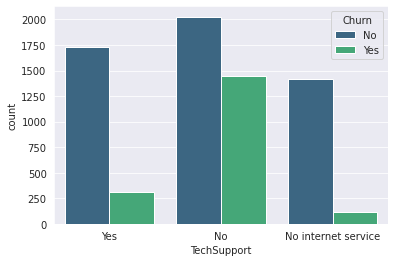

In [ ]:
sns.countplot(x='TechSupport', 
              hue='Churn',
              data=bd, 
              palette='viridis')

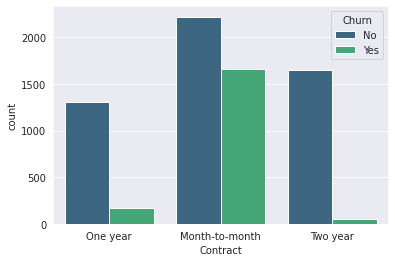

In [ ]:
sns.countplot(x='Contract', 
              hue='Churn',
              data=bd, 
              palette='viridis')

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(bd, x='Churn', color='Churn', text_auto=True)
fig.show()

In [ ]:
fig = px.histogram(bd, 
                   x='Contract', 
                   color="Churn",
                   title="Evasão por Tipo de Contrato",
                   text_auto=True)
fig.show()

In [ ]:
fig = px.histogram(bd, 
                   x='PaymentMethod', 
                   color="Churn",
                   marginal='rug',
                   title="Evasão por Tipo de Pagamento",
                   text_auto=True)
fig.show()

In [ ]:
fig = px.box(bd, 
             x='tenure',
             y='Churn',
             points="all",
             color='Churn',
             title="Evasão por Tempo de contrato do cliente")
fig.show()

In [ ]:
for col in ['tenure', 'Charges.Monthly', 'Charges.Total']:
    fig = px.box(bd, x=col, y='Churn', points="all", color='Churn', title=f"Boxplot de {col} por Churn")
    
    fig.show()

In [ ]:
bd.corr()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
Charges.Monthly,0.220173,0.247900,1.000000,0.651182
Charges.Total,0.102997,0.826164,0.651182,1.000000


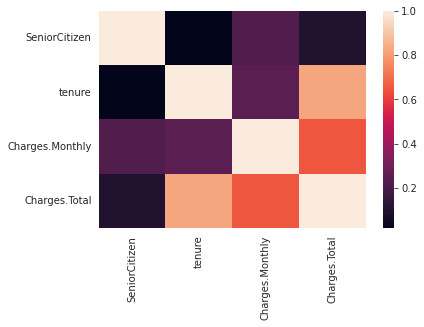

In [ ]:
sns.heatmap(bd.corr())

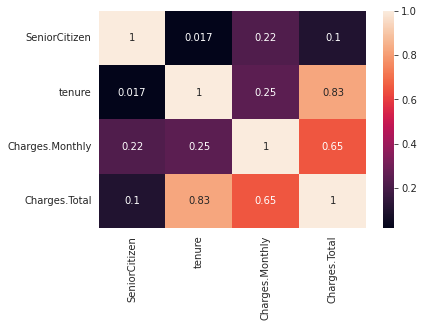

In [ ]:
sns.heatmap(bd.corr(), annot=True)

In [ ]:
fig = px.scatter_matrix(bd,
                        dimensions=["SeniorCitizen", "tenure", "Charges.Monthly", "Charges.Total"],
                        color="Churn",
                        title="Scatter matrix sobre o Churn")
fig.show()

In [ ]:
fig = px.scatter_matrix(bd,
                        dimensions=["SeniorCitizen", "tenure", "Charges.Monthly", "Charges.Total"],
                        color="Churn",
                        title="Scatter matrix sobre o Churn sem a diagonal")
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
fig = px.scatter_matrix(bd,
                        dimensions=["Charges.Monthly", "Charges.Total"],
                        color="Churn",
                        title="Scatter matrix sobre o Churn sem a diagonal")
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
bd.drop(['customerID', 'Charges.Total'], axis=1, inplace=True)

In [ ]:
bd

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10
7040,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85


In [ ]:
df = bd

# **Data Preprocessing**
**Feature Engineering**

---



*Feature Engineering: Transformação das variáveis categóricas em numéricas através da técnica de codificação One-Hot-Encoding*

Encoding InternetService column

In [ ]:
internetservice = pd.get_dummies(df['InternetService'],prefix='InternetService').drop('InternetService_No',axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


Encoding DeviceProtection, TechSupport, OnlineSecurity, OnlineBackup, Streaming TV and StreamingMovies


In [ ]:
for i in ['DeviceProtection','TechSupport','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i).drop('{}_No internet service'.format(i),axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,0,0,1,1,0,0,1,0,1,1,0
1,1,0,1,0,1,0,1,0,1,0,1,0,0,1
2,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,1,0,1,0,1
4,0,1,1,0,0,1,1,0,1,0,0,1,1,0


Encoding gender, Partner, Dependents, PhoneService, Contract, 
PaperlessBilling, PaymentMethods


In [ ]:
for i in ['gender','Partner','Dependents','PhoneService','Contract','PaperlessBilling','PaymentMethod']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i,drop_first=True)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,...,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,0,1,...,0,1,1,1,1,0,1,0,0,1
1,1,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,1,...,1,1,0,1,0,0,1,0,1,0
4,0,1,1,0,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1


# **Encoding MultipleLines column**

In [ ]:
internetservice = pd.concat([internetservice,pd.get_dummies(df['MultipleLines'],prefix='MultiLines').drop('MultiLines_No phone service',axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,...,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes
0,1,0,1,0,0,1,1,0,0,1,...,1,1,1,0,1,0,0,1,1,0
1,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
4,0,1,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0


# **Encoding Churn column**

In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})



---



# **Dataset Splitting**

*Dataset Splitting: Divisão dos dados para treino do modelo e teste. Os dados de teste foram guardados até o fim do projeto (pois representam dados novos que nunca foram vistos);*

In [ ]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15
7039,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10
7040,0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30
7041,0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85


In [ ]:
internetservice = pd.concat([internetservice,df[['SeniorCitizen','tenure','Churn']]],axis=1)
internetservice.columns

Index(['InternetService_DSL', 'InternetService_Fiber optic',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultiLines_No', 'MultiLines_Yes', 'SeniorCitizen', 'tenure', 'Churn'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

# **Correlation Analysis**


---



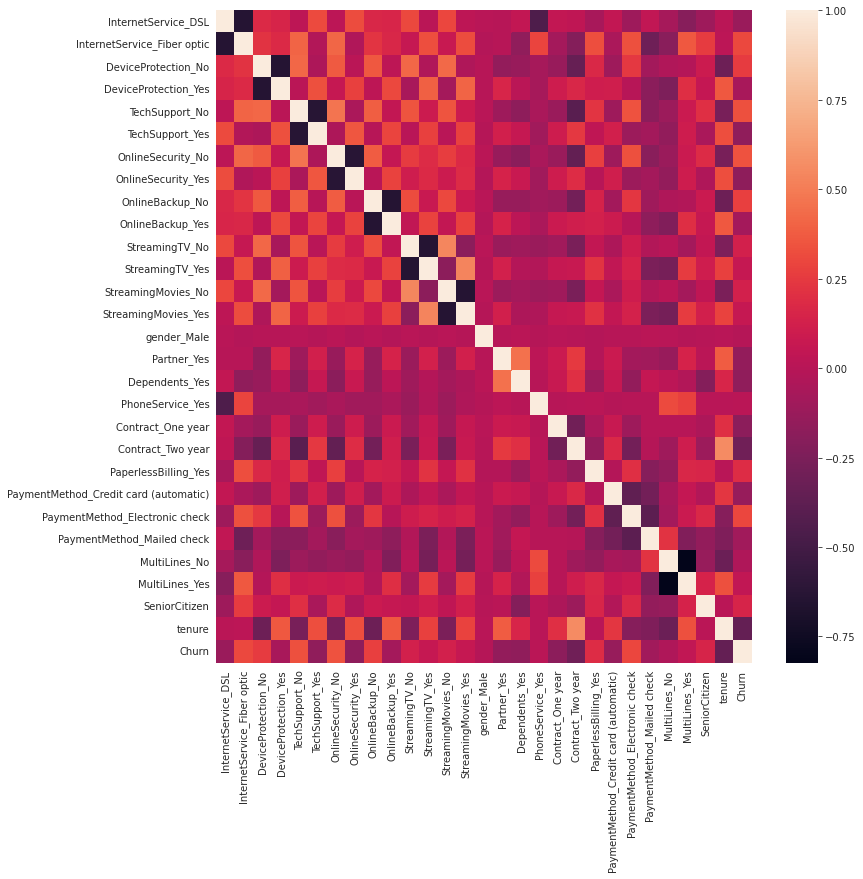

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(internetservice.corr())

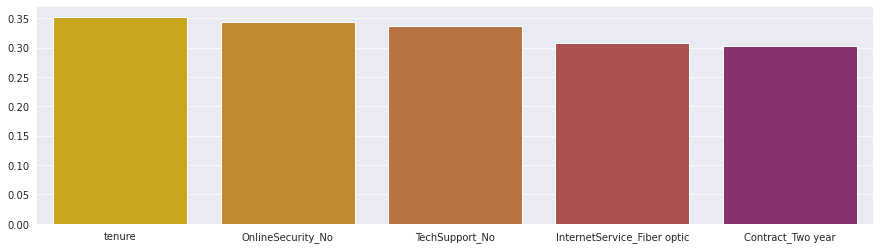

In [ ]:
top_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[1:6]

plt.figure(figsize=(15,4))
sns.barplot(y=top_corr.values,
            x=top_corr.index,
            palette=sns.color_palette(["#E6B800","#D69019","#CC6F2E","#B84446","#972573"]))

*INSIGHT: Looking at the y-axis, we notice that the top 5 correlations shown above have their values between 0.3 and 0.35 (which are relatively low correlations).*


In [ ]:
tail_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[-10:]
tail_corr

InternetService_DSL           0.124214
PaymentMethod_Mailed check    0.091683
OnlineBackup_Yes              0.082255
DeviceProtection_Yes          0.066160
StreamingTV_Yes               0.063228
StreamingMovies_Yes           0.061382
MultiLines_Yes                0.040102
MultiLines_No                 0.032569
PhoneService_Yes              0.011942
gender_Male                   0.008612
Name: Churn, dtype: float64

*INSIGHT: We got above the 10 features that least correlates with the Chrun variable;*

# **Machine Learning Modeling**
[First Cycle] Modeling with Unbalanced Dataset
Creating Models
Baseline
 

*   The baseline model will provide comparative metrics predicted from the data in a simple way;
*   The cross validate technique will be used on all models to be tested;
*   The confusion matrix will be used when we test the final model with the reserved test data;








In [ ]:
base_classifier = DummyClassifier(random_state=1)

In [ ]:
# Creating baseline list of metrics
baseline = []

# Cross validating the model
cv_result = cross_validate(base_classifier, 
                           X_train, 
                           y_train, 
                           cv=10,
                           scoring =['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to baseline list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  baseline.append(cv_result[i].mean())

In [ ]:
# Printing the baseline metrics
baseline

[0.7328664719023885, 0.0, 0.0, 0.0, 0.5]

# **Logistic Regression**

---



In [ ]:
classifierLR = LogisticRegression(random_state = 1)

In [ ]:
# Creating Logistic Regression list of metrics
logistic_regression = []

# Cross validating the model
cv_result = cross_validate(classifierLR, 
                           X_train, 
                           y_train, 
                           cv=10,
                           scoring=  ['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

In [ ]:
# Printing the Logistic Regression metrics
logistic_regression

[0.8000741106719367,
 0.6511639111321158,
 0.5464039556487863,
 0.5933559979958571,
 0.8427338731572259]

# **N Nearest Neighbors (KNN)**

---



In [ ]:
classifierKNN = KNeighborsClassifier()

In [ ]:
# Creating KNN list of metrics
knn = []

# Cross validating the model
cv_result = cross_validate(classifierKNN, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to KNN list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  knn.append(cv_result[i].mean())

In [ ]:
# Printing the KNN metrics
knn

[0.7629668614309446,
 0.5619433465254383,
 0.5322595145340125,
 0.5458274786046882,
 0.782324409650889]

# **Support Vector Machine (SVM)**

---



In [ ]:
classifierSVM = SVC(random_state=0)

In [ ]:
# Creating SVM list of metrics
svm = []

# Cross validating the model
cv_result = cross_validate(classifierSVM, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to SVM list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  svm.append(cv_result[i].mean())

In [ ]:
# Printing the SVM metrics
svm

[0.7887140545339978,
 0.6702064391439957,
 0.4160223753870742,
 0.5119550700408295,
 0.8084278272748641]

# **Naive Bayes**

---



In [ ]:
classifierNB = GaussianNB()

In [ ]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes.append(cv_result[i].mean())

In [ ]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes

[0.7542597525347998,
 0.5286886016120957,
 0.7505344121466386,
 0.6201657135250714,
 0.8285825764545864]

# **Decision Tree**

---



In [ ]:
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


In [ ]:
# Creating Decision Tree list of metrics
decision_tree = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree.append(cv_result[i].mean())

In [ ]:
# Printing the Decision Tree metrics
decision_tree

[0.727569527983044,
 0.49018662535224866,
 0.4876186195185296,
 0.48869200763159737,
 0.6656492371298148]

# **Random Forest**

---



In [ ]:
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)


In [ ]:
# Creating Random Forest list of metrics
random_forest = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

In [ ]:
# Printing the Random Forest metrics
random_forest

[0.7841711061465315,
 0.6307597937569103,
 0.4670212765957446,
 0.5354006351725881,
 0.7908939045616112]

# **XG Boost**

---



In [ ]:
classifierXGB = XGBClassifier()


In [ ]:
# Creating XG Boost list of metrics
XGB = []

# Cross validating the model
cv_result = cross_validate(classifierXGB, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to XG Boost list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  XGB.append(cv_result[i].mean())

In [ ]:
# Printing the XG Boost metrics
XGB

[0.8017750759007848,
 0.6643918935449752,
 0.527274997502747,
 0.5868716789978408,
 0.847167916032927]

# **Classification Models Comparison**

---



In [ ]:
metrics = (pd.DataFrame([baseline,logistic_regression,knn,svm,naive_bayes,decision_tree,random_forest,XGB],
                        index=['Baseline','Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XG Boost'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics

,Accuracy,Precision,Recall,F1 Score,AUROC
Baseline,73.29,0.00,0.00,0.00,50.00
Logistic Regression,80.01,65.12,54.64,59.34,84.27
KNN,76.30,56.19,53.23,54.58,78.23
SVM,78.87,67.02,41.60,51.20,80.84
Naive Bayes,75.43,52.87,75.05,62.02,82.86
Decision Tree,72.76,49.02,48.76,48.87,66.56
Random Forest,78.42,63.08,46.70,53.54,79.09
XG Boost,80.18,66.44,52.73,58.69,84.72


In [ ]:
metrics['Recall'].sort_values(ascending=False)

Naive Bayes            75.05
Logistic Regression    54.64
KNN                    53.23
XG Boost               52.73
Decision Tree          48.76
Random Forest          46.70
SVM                    41.60
Baseline                0.00
Name: Recall, dtype: float64



*   We can see above that the Naive Bayes model as a Recall almost 20% over Logistic Regression, and beceause of this, we are going to tune it;




*O recall é a métrica mais importante a ser analisada (seguida do F1 Score) pois indica quantos clientes que estão propensos a deixaram a Telco foram realmente previstos corretamente. Como podemos ver na tabela acima, os valores foram muito baixos, havendo apenas um exceção com o modelo Naive Bayes.*

Portanto iremos realizar

In [ ]:
X = internetservice.drop(['Churn'], axis = 1)
y = internetservice['Churn']

In [ ]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
dados = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [ ]:
dados.to_json("/content/drive/MyDrive/06.Projetos/01.Alura/Challenge_Data_Science_1/Dados/Telco-Customer-Churn-balanceamento.json")

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_res , y_res, random_state=SEED)

In [ ]:
# Creating SVM list of metrics
svm = []

# Cross validating the model
cv_result = cross_validate(classifierSVM, X_treino, y_treino, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to SVM list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  svm.append(cv_result[i].mean())

In [ ]:
# Creating Logistic Regression list of metrics
logistic_regression = []

# Cross validating the model
cv_result = cross_validate(classifierLR, 
                           X_treino, 
                           y_treino, 
                           cv=10,
                           scoring=  ['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

In [ ]:
# Creating KNN list of metrics
knn = []

# Cross validating the model
cv_result = cross_validate(classifierKNN, X_treino, y_treino, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to KNN list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  knn.append(cv_result[i].mean())

In [ ]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_treino, y_treino, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes.append(cv_result[i].mean())

In [ ]:
# Creating Decision Tree list of metrics
decision_tree = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_treino, y_treino, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree.append(cv_result[i].mean())

In [ ]:
# Creating Random Forest list of metrics
random_forest = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_treino, y_treino, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

In [ ]:
# Creating XG Boost list of metrics
XGB = []

# Cross validating the model
cv_result = cross_validate(classifierXGB, X_treino, y_treino, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to XG Boost list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  XGB.append(cv_result[i].mean())

In [ ]:
metrics2 = (pd.DataFrame([logistic_regression,knn,svm,naive_bayes,decision_tree,random_forest,XGB],
                        index=['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XG Boost'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics2

,Accuracy,Precision,Recall,F1 Score,AUROC
Logistic Regression,79.28,77.28,83.34,80.18,87.52
KNN,81.63,76.52,91.64,83.39,88.74
SVM,77.39,75.66,81.16,78.30,85.03
Naive Bayes,78.19,76.15,82.47,79.18,85.08
Decision Tree,80.25,79.16,82.47,80.76,80.63
Random Forest,83.21,83.18,83.57,83.36,90.72
XG Boost,81.79,79.17,86.62,82.72,89.71


In [ ]:
metrics2['Recall'].sort_values(ascending=False)

KNN                    91.64
XG Boost               86.62
Random Forest          83.57
Logistic Regression    83.34
Naive Bayes            82.47
Decision Tree          82.47
SVM                    81.16
Name: Recall, dtype: float64

In [ ]:
metrics['Recall'].sort_values(ascending=False)

Naive Bayes            75.05
Logistic Regression    54.64
KNN                    53.23
XG Boost               52.73
Decision Tree          48.76
Random Forest          46.70
SVM                    41.60
Baseline                0.00
Name: Recall, dtype: float64